<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Day 1) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

This dataset is created for the prediction of Graduate admissions from an Indian perspective. The dataset contains various features that are important during the application for the Master's Program. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a student for admission.

## About the dataset (Graduate admissions prediction data)

**Serial No.:** Serial number of student 

**GRE Scores:** GRE score (out of 340)

**TOEFL Scores:** TOEFL score (out of 120)

**University Rating:** University rating (out of 5)

**SOP:** Strength of Statement of Purpose (out of 5)

**LOR:** Strength of Letter of Recommendation (out of 5)

**CGPA:** Undergraduate CGPA (out of 10)

**Research:** Research experience (either 0 or 1)

**Chance of Admit:** Chance of admission (target/dependent variable)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**
        - 3.1.2 - **[Cost-based Method](#cost)**
4. **[Recursive Feature Elimination (RFE)](#rfe)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [3]:
# load the csv file
# store the data in 'df_admissions'
df_admissions = pd.read_csv('Admission_predict.csv')

# display first five observations using head()
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,1
1,2,324,107,4,4.000000,4.500000,8.870000,1,1
2,3,316,104,3,3.000000,3.500000,8.000000,1,0
3,4,322,110,3,3.500000,2.500000,8.670000,1,1
4,5,314,103,2,2.000000,3.000000,8.210000,0,0


**Let us now see the number of variables and observations in the data.**

In [4]:
# use 'shape' to check the dimension of data
df_admissions.shape

(400, 9)

**Interpretation:** The data has 400 observations and 9 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [5]:
# use 'dtypes' to check the data type of a variable
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

**Interpretation:** The variables `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR` and `CGPA` are numerical.

From the above output, we see that the data type of `Research` is 'int64'.

But according to the data definition, `Research` is a categorical variable, which is wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [6]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'Research'
df_admissions['Research'] = df_admissions['Research'].astype(object)

#### Recheck the data type after the conversion. 

In [7]:
# recheck the data types using 'dtypes'
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `Serial No.` contains the serial number of the student, which is redundant for further analysis. Thus, we drop the column.

In [8]:
# drop the column 'Serial No.' using drop()
# 'axis = 1' drops the specified column
df_admissions = df_admissions.drop('Serial No.', axis = 1)

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

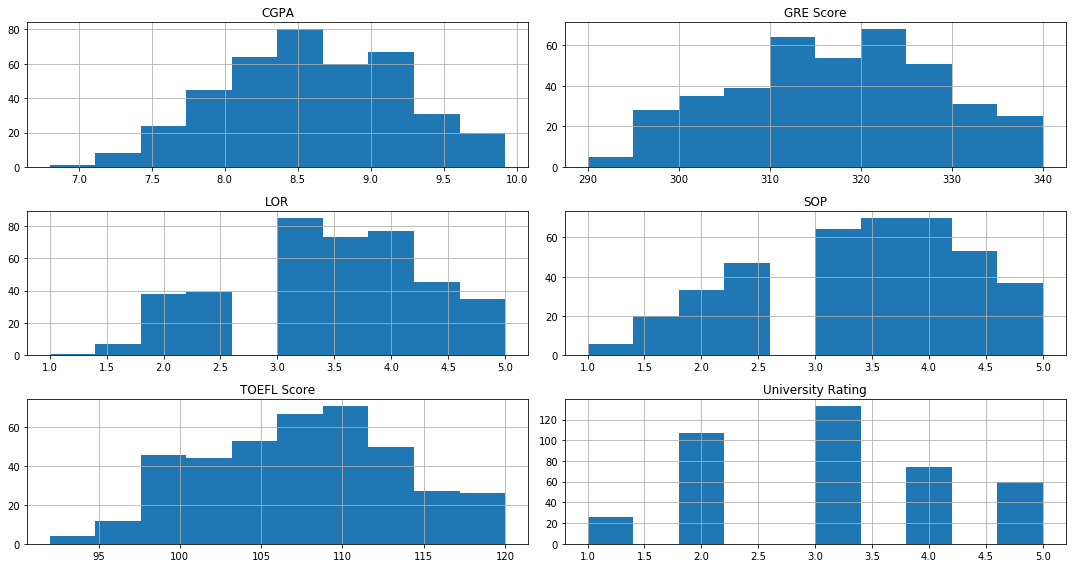

Skewness:


GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

In [9]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_admissions.drop('Chance of Admit', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_admissions.drop('Chance of Admit', axis = 1).skew()

**Interpretation:** The above plot indicates that all the variables are near normally distributed.

**Distribution of categoric independent variable.**

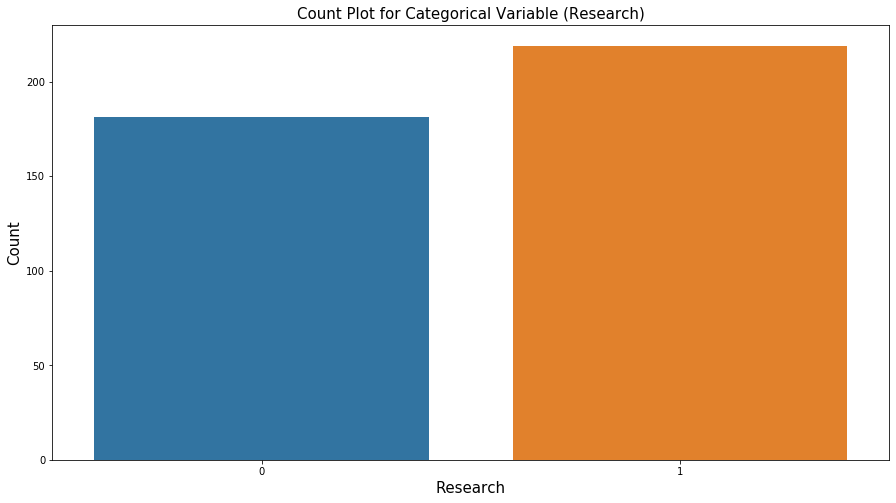

In [10]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_admissions.Research)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

#### Distribution of dependent variable.

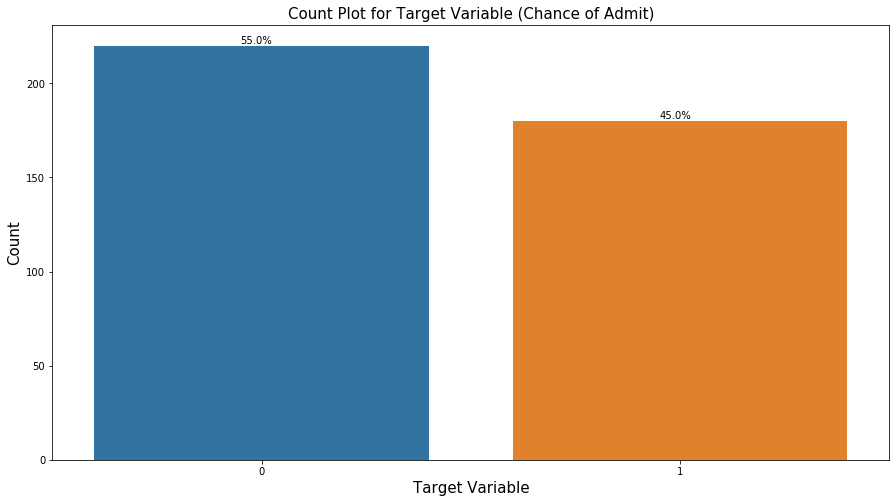

In [11]:
# consider only the target variable
df_target = df_admissions['Chance of Admit'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation:** The above plot shows that there is no imbalance in the target variable.

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [12]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_admissions.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_admissions.isnull().sum()*100/df_admissions.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Chance of Admit,0,0.000000
Research,0,0.000000
CGPA,0,0.000000
LOR,0,0.000000
SOP,0,0.000000
University Rating,0,0.000000
TOEFL Score,0,0.000000
GRE Score,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [13]:
# store the target variable 'Chance of Admit' in a dataframe 'df_target'
df_target = df_admissions['Chance of Admit']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df_admissions.drop('Chance of Admit', axis = 1)

#### Filter numerical and categorical variables.

In [14]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [15]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['Research'], dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [16]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="scale"></a>
## 2.7 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [17]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [18]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


<a id="split"></a>
## 2.8 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [19]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 8)
y_train (320,)
X_test (80, 8)
y_test (80,)


#### Create a generalized function to create a dataframe containing the scores for the models.

In [20]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [21]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:                  0.6486
Time:                        12:35:06   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7119      0.330     -2.157      0.031      -1.359      -0.065
GRE Scor

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is the value of `McFadden's R-squared`. This value can be obtained from the formula:

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

Where,<br>
Log-Likelihood: It is the maximum value of the log-likelihood function<br>
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept 

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of `pseudo R-squared` such as `Cox & Snell R-squared`, `Nagelkerke R-squared` and so on.

**Cox & Snell R-squared:** The convergence of the logistic model can be determined by the R-squared value. It is given by the formula:

<p style='text-indent:25em'> <strong> Cox & Snell R-squared = $ 1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N} $</strong> </p>

Where,<br> 
L(M): The conditional probability of target variable given the independent variables<br>
N: Total number of observations

**Note:** The maximum of Cox & Snell R-squared is always less than 1. It is equal to $(1 - (L(M_{Intercept})^{2/N})$



**Nagelkerke R-squared:** It is defined as the ratio of Cox & Snell R-squared to the maximum of Cox & Snell R-squared. The formula is given as:

<p style='text-indent:25em'> <strong>Nagelkerke  R-squared = $ \frac{1 - (\frac{L(M_{Intercept})}{L(M_{Full})})^{2/N}}{1 -  (L(M_{Intercept})^{2/N}} $</strong> </p>



Thus, Nagelkerke R-squared can be equal to 1, if $L(M_{Full}) = 1$


**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [22]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 170.44859325107456


We can use the AIC value to compare different models created on the same dataset.

### Interpret the odds for each variable 

In [23]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.490694
GRE Score,1.839477
TOEFL Score,1.220082
University Rating,1.800906
SOP,1.193371
LOR,1.668273
CGPA,13.836155
Research_1,1.789418


**Interpretation:** 

odds_const: The odds of getting an admission is 0.490694, considering all other variables take zero value 

odds_GRE_Score = 1.839477, it implies that the odds of getting admission increases by a factor of 1.839477 due to one unit increase in the GRE score, keeping other variables constant

odds_TOEFL_Score = 1.220082, it implies that the odds of getting admission increases by a factor of 1.220082 due to one unit increase in the TOEFL score, keeping other variables constant

odds_University_Rating = 1.800906, it implies that the odds of getting admission increases by a factor of 1.800906 due to one unit increase in the university rating, keeping other variables constant

odds_SOP = 1.193371, it implies that the odds of getting admission increases by a factor of 1.193371 due to one unit increase in the SOP strength, keeping other variables constant

odds_LOR = 1.668273, it implies that the odds of getting admission increases by a factor of 1.668273 due to one unit increase in the LOR strength, keeping other variables constant

odds_CGPA = 13.836155, it implies that the odds of getting admission increases by a factor of 13.836155 due to one unit increase in the CGPA, keeping other variables constant
 
odds_Research_1 = 1.789418, it implies that the odds of getting admission for the students with research experience over the odds of getting admission for the students with no research experience is 1.789418, keeping other variables constant

**Do predictions on the test set.**

In [24]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

332   0.050634
111   0.800663
352   0.016492
205   0.000668
56    0.001146
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [25]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [26]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 1, 0, 0, 0]

#### Plot the confusion matrix.

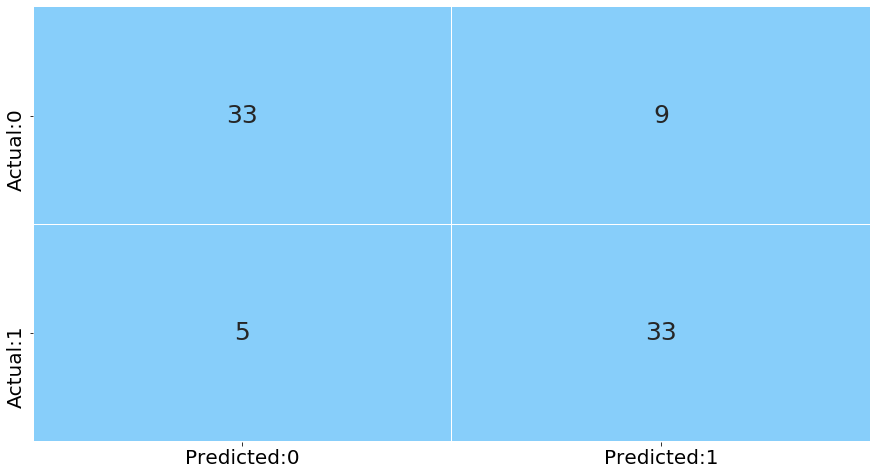

In [27]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [28]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [29]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.7857142857142857

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [30]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.868421052631579

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [31]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.7857142857142857

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [32]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.825

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [33]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.825

**Interpretation:** For our dataset, both the values for accuracy and f1-score are equal. We can say that our model is 82.5% accurate.

We can also calculate the above measures using the `classification_report()`

In [34]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.79      0.87      0.82        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



**Interpretation:** 

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [35]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6508728179551122


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is 0.6509, we can say that there is substantial agreement between the actual and predicted values.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

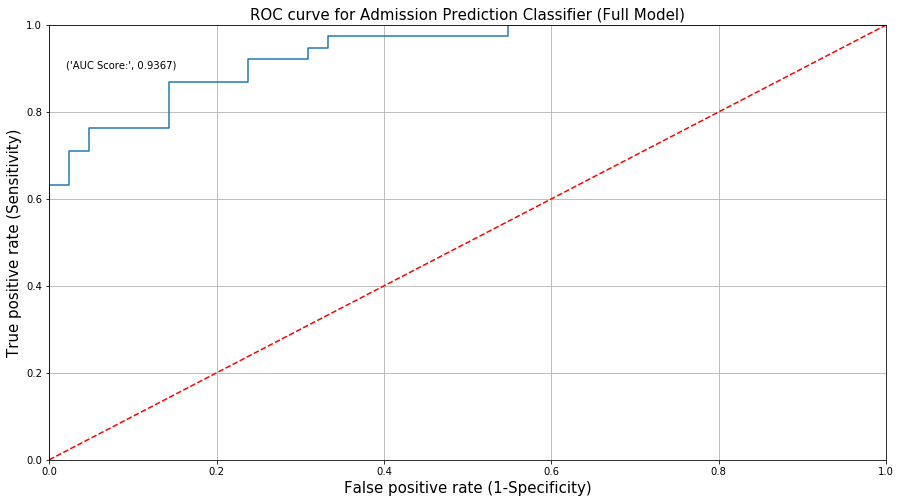

In [36]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.9367.

<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

**Tabulate the performance measures for different cut-offs.**

The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.

In [37]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [38]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.760652,0.660714,0.973684,0.75,0.509804,0.787234
1,0.2,0.807018,0.72,0.947368,0.8,0.604938,0.818182
2,0.3,0.829574,0.76087,0.921053,0.825,0.652605,0.833333
3,0.4,0.828321,0.772727,0.894737,0.825,0.651741,0.829268
4,0.5,0.827068,0.785714,0.868421,0.825,0.650873,0.825
5,0.6,0.862782,0.846154,0.868421,0.8625,0.724656,0.857143
6,0.7,0.823308,0.833333,0.789474,0.825,0.648241,0.810811
7,0.8,0.822055,0.852941,0.763158,0.825,0.647355,0.805556
8,0.9,0.803885,0.96,0.631579,0.8125,0.617834,0.761905


**Interpretation:** The above dataframe shows that, the model cut_off probability 0.6, returns the highest AUC score, f1-score, kappa score and accuracy.

#### In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.

#### To obtain the optimal cut-off value we use the following methods:

1. Youden's Index
2. Cost-based Method

<a id="youden"></a>
### 3.1.1 Youden's Index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [39]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.868421,0.142857,0.618555,0.725564
1,0.763158,0.047619,0.841912,0.715539
2,0.710526,0.023810,0.860956,0.686717
3,0.921053,0.238095,0.380299,0.682957
4,0.710526,0.047619,0.858806,0.662907


As we can see that the optimal cut-off probability is approximately 0.62. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.62, then consider it to be 0 else consider it to be 1.

In [40]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.62 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

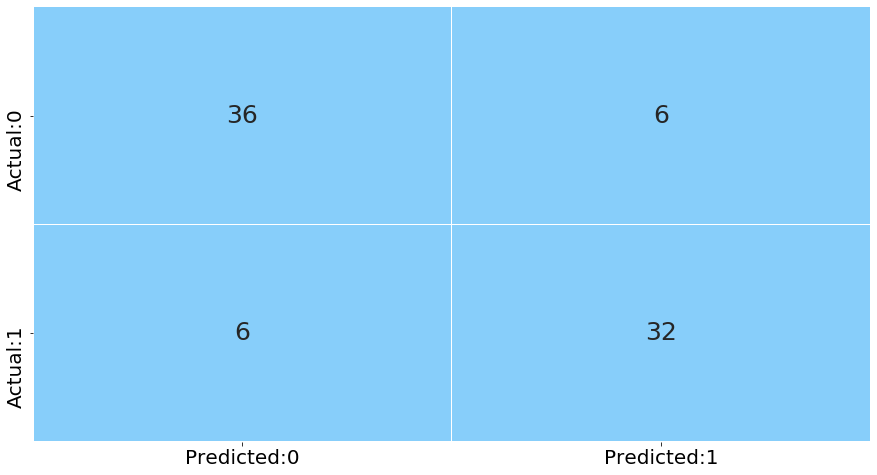

In [41]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [42]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.84      0.84      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



**Interpretation:** From the above output, we can see that the model with cut-off = 0.62, is 85% accurate. The specificity and the sensitivity are nearly balanced.

In [43]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6992481203007519


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.62) is 0.6992, we can say that there is substantial agreement between the actual and predicted values.

<a id="cost"></a>
### 3.1.2 Cost-based Method

The full logistic regression model (build in section 3), have different values for false positives (FP) and false negatives (FN). Thus, we can use the cost-based method to calculate the optimal value of the cut-off. In this method, we find the optimal value of the cut-off for which the total cost is minimum. The total cost is given by the formula:

<p style='text-indent:25em'> <strong>total_cost = FN x C_1 + FP x C_2 </strong> </p>

Where,<br>
C_1: It is the cost of false negatives <br>
C_2: It is the cost of false positives

The cost values can be decided using business knowledge.

In [44]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 3.5 and 2 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3.5, 2) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1

In [45]:
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first ten rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
46,0.560000,29.500000
47,0.570000,29.500000
48,0.580000,29.500000
49,0.590000,29.500000
50,0.600000,29.500000
51,0.610000,29.500000
26,0.360000,30.500000
27,0.370000,30.500000
28,0.380000,30.500000
25,0.350000,30.500000


From the above output we can see that, the 'total_cost' is same for the cut-off probability values 0.56, 0.57, 0.58, 0.59, 0.60 and 0.61. Thus, we can consider any of these value as the cut-off probability.

Here, we are considering the cut-off value as 0.58. i.e. if 'y_pred_prob' is less than 0.58, then consider it to be 0 else consider it to be 1.

In [46]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_cost = [ 0 if x < 0.58 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

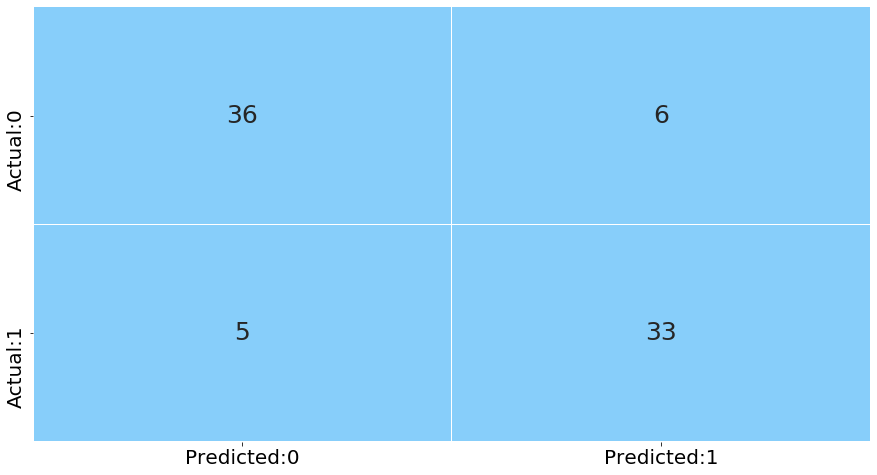

In [47]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_cost)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [48]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_cost)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.85      0.87      0.86        38

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



**Interpretation:** From the above output, we can see that the model with cut-off = 0.58 is 86% accurate. 

In [49]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_cost)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.7246558197747184


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.58) is 0.7247, we can say that there is substantial agreement between the actual and predicted values.

<a id="rfe"></a>
# 4. Recursive Feature Elimination (RFE)

In the linear regression module, we learn about various techniques for selecting the significant features in the dataset. In this example, let us consider the RFE method for feature selection.

In [50]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 3)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['GRE Score', 'University Rating', 'CGPA'], dtype='object')


#### Build the logisitc regression model using the variables obtained from RFE.

In [51]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train[['const', 'GRE Score', 'University Rating', 'CGPA']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.251732
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:                  0.6335
Time:                        12:35:12   Log-Likelihood:                -80.554
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 4.590e-60
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4202      0.205     -2.046      0.041      -0.823      -0.018
GRE Scor

**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [52]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg_rfe.aic)

AIC: 169.1085789639927


**Do predictions on the test set.**

In [53]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test[['const', 'GRE Score', 'University Rating', 'CGPA']])

# print the y_pred_prob_rfe
y_pred_prob_rfe.head()

332   0.046820
111   0.727388
352   0.007586
205   0.000586
56    0.001808
dtype: float64

Since the target variable can take only two values either 0 or 1. We consider the cut-off value 0.6. i.e. if 'y_pred_prob_rfe' is less than 0.6, then consider it to be 0 else consider it to be 1.

In [54]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.6 else 1 for x in y_pred_prob_rfe]

In [55]:
# print the first five observations of y_pred_rfe
y_pred_rfe[0:5]

[0, 1, 0, 0, 0]

#### Plot the confusion matrix.

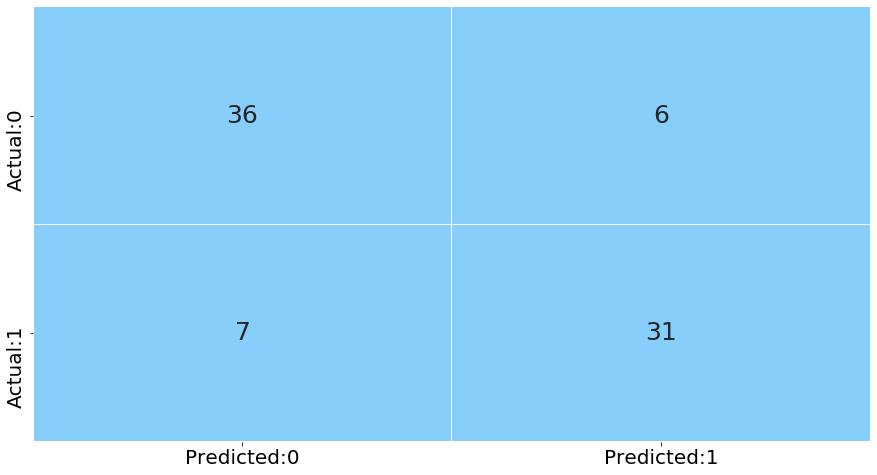

In [56]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_rfe)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

#### Compute the performance measures.

In [57]:
# performance measures obtained by classification_report()
result = classification_report(y_test, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.84      0.82      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



**Interpretation:** From the above output, we can see that the model with cut-off = 0.6 is 84% accurate. 

In [58]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_rfe)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6737766624843162


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.6) is 0.6738, we can say that there is substantial agreement between the actual and predicted values.

#### Plot the ROC curve.

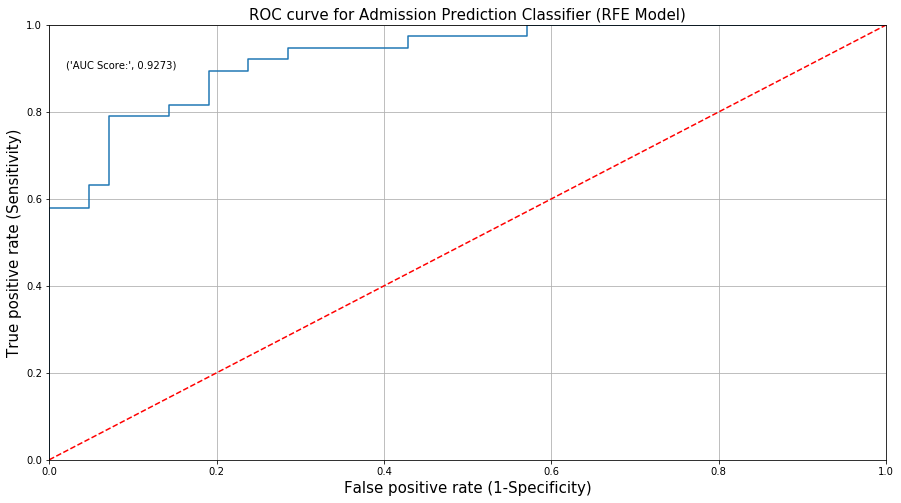

In [59]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression with features obtained from RFE method) is away from the dotted line; with the AUC score 0.9273